# **Project: Amazon Product Recommendation System**

# **Marks: 60**


Welcome to the project on Recommendation Systems. We will work with the Amazon product reviews dataset for this project. The dataset contains ratings of different electronic products. It does not include information about the products or reviews to avoid bias while building the model.

--------------
## **Context:**
--------------

Today, information is growing exponentially with volume, velocity and variety throughout the globe. This has lead to information overload, and too many choices for the consumer of any business. It represents a real dilemma for these consumers and they often turn to denial. Recommender Systems are one of the best tools that help recommending products to consumers while they are browsing online. Providing personalized recommendations which is most relevant for the user is what's most likely to keep them engaged and help business.

E-commerce websites like Amazon, Walmart, Target and Etsy use different recommendation models to provide personalized suggestions to different users. These companies spend millions of dollars to come up with algorithmic techniques that can provide personalized recommendations to their users.

Amazon, for example, is well-known for its accurate selection of recommendations in its online site. Amazon's recommendation system is capable of intelligently analyzing and predicting customers' shopping preferences in order to offer them a list of recommended products. Amazon's recommendation algorithm is therefore a key element in using AI to improve the personalization of its website. For example, one of the baseline recommendation models that Amazon uses is item-to-item collaborative filtering, which scales to massive data sets and produces high-quality recommendations in real-time.

----------------
## **Objective:**
----------------

You are a Data Science Manager at Amazon, and have been given the task of building a recommendation system to recommend products to customers based on their previous ratings for other products. You have a collection of labeled data of Amazon reviews of products. The goal is to extract meaningful insights from the data and build a recommendation system that helps in recommending products to online consumers.

-----------------------------
## **Dataset:**
-----------------------------

The Amazon dataset contains the following attributes:

- **userId:** Every user identified with a unique id
- **productId:** Every product identified with a unique id
- **Rating:** The rating of the corresponding product by the corresponding user
- **timestamp:** Time of the rating. We **will not use this column** to solve the current problem

**Note:** The code has some user defined functions that will be usefull while making recommendations and measure model performance, you can use these functions or can create your own functions.

Sometimes, the installation of the surprise library, which is used to build recommendation systems, faces issues in Jupyter. To avoid any issues, it is advised to use **Google Colab** for this project.

Let's start by mounting the Google drive on Colab.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Installing surprise library**

In [2]:
# As google colab has modified the version of numpy available as a default from
# numpy 1.x to 2.x, it is necessary to downgrade numpy to a version that is
# compatible with surprise and pandas.

!pip uninstall -y numpy
!pip install numpy==1.24.3

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 68.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.3 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.3 which is incompatible.
albucore 0.0.23 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
blosc2 3.2.0 requires numpy>=1.26, but you have numpy 1.24.3 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.3 which is incompatible.
albumentations 2.0.5 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.3 which is incompatible.
pymc 5.21.1 requires 

In [1]:
# Installing surprise
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2505213 sha256=598fa00eae50ed29a442e32637e57786a437022765b96c58882f61d5c6e45bc7
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


## **Importing the necessary libraries and overview of the dataset**

In [2]:
import os # Needed to change the working dir

import numpy as np # Numeric manipulations
import pandas as pd # DataFrame manipulations

import matplotlib.pyplot as plt # Data visualization
from matplotlib.ticker import FuncFormatter # Useful to format tick labels
import seaborn as sns # Data visualization

from collections import defaultdict # Dictionary that does not raise a key error

from sklearn.metrics import mean_squared_error # Performance metrics in sklearn

# Library to help with creating advanced recommendation systems
# To compute accuracy of models
from surprise import accuracy

# To parse file containing ratings
from surprise.reader import Reader

# To load and work with datasets
from surprise.dataset import Dataset

# For hyperparameter tuning, and splitting data in train and test datasets
from surprise.model_selection import GridSearchCV, train_test_split

# For K-Fold cross-validation
from surprise.model_selection import KFold

# For similarity-based recommendation systems
from surprise.prediction_algorithms.knns import KNNBasic

# For matrix factorization based recommendation systems
from surprise.prediction_algorithms.matrix_factorization import SVD

# For clustering-based recommendation systems
from surprise import CoClustering

In [3]:
# Modify maximum width of pandas Dataframe columns
pd.set_option('max_colwidth', None)

### **Loading the data**
- Import the Dataset
- Add column names ['user_id', 'prod_id', 'rating', 'timestamp']
- Drop the column timestamp
- Copy the data to another DataFrame called **df**

In [4]:
# Changing the working directory
os.chdir('/content/drive/MyDrive/ADSP/ElectiveProjects/RS/final')

In [6]:
# Import csv and add names for columns, as the csv file does not provide any
# column names in the data set
data = pd.read_csv('ratings_Electronics.csv',
                   names=['user_id', 'prod_id', 'rating', 'timestamp'])
data = data.drop('timestamp', axis=1)
df = data.copy(deep=True) # Get deep copy of Dataset
df.head()

,user_id,prod_id,rating
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


**As this dataset is very large and has 7,824,482 observations, it is not computationally possible to build a model using this. Moreover, many users have only rated a few products and also some products are rated by very few users. Hence, we can reduce the dataset by considering certain logical assumptions.**

Here, we will be taking users who have given at least 50 ratings, and the products that have at least 5 ratings, as when we shop online we prefer to have some number of ratings of a product.

In [7]:
# Get the column containing the users
users = df.user_id

# Create a dictionary from users to their number of ratings
ratings_count = dict()

for user in users:

    # If we already have the user, just add 1 to their rating count
    if user in ratings_count:
        ratings_count[user] += 1

    # Otherwise, set their rating count to 1
    else:
        ratings_count[user] = 1

In [8]:
# We want our users to have at least 50 ratings to be considered
RATINGS_CUTOFF = 50

remove_users = []

for user, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)

df = df.loc[ ~ df.user_id.isin(remove_users)]

In [9]:
# Get the column containing the products
prods = df.prod_id

# Create a dictionary from products to their number of ratings
ratings_count = dict()

for prod in prods:

    # If we already have the product, just add 1 to its rating count
    if prod in ratings_count:
        ratings_count[prod] += 1

    # Otherwise, set their rating count to 1
    else:
        ratings_count[prod] = 1

In [10]:
# We want our item to have at least 5 ratings to be considered
RATINGS_CUTOFF = 5

remove_users = []

for user, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)

df_final = df.loc[~ df.prod_id.isin(remove_users)]

In [11]:
# Print a few rows of the imported dataset
df_final.head()

,user_id,prod_id,rating
1310,A3LDPF5FMB782Z,1400501466,5.0
1322,A1A5KUIIIHFF4U,1400501466,1.0
1335,A2XIOXRRYX0KZY,1400501466,3.0
1451,AW3LX47IHPFRL,1400501466,5.0
1456,A1E3OB6QMBKRYZ,1400501466,1.0


### **Utility classes**

In [12]:
# To help with analyzing, and comparing the different models we will build,
# let's create a utility class with which to store and track the different results
# and metrics for each of the models

class KY_ModelResults():

  from enum import Enum

  """
  Simple utility class used to monitor the results we get from model building,
  hypertuning and predictions.
  """

  # This Enum contains all the possible types of results you could get.
  class ResultType(Enum):
    PRF1 = 1 # RMSE Precision Recall F1 /!\ modify your precision_recall_f1_at_k return tuple to add RMSE, if you want to monitor it as well
    PRED = 2 # Prediction

  def __init__(self) -> None:
      self._result_list = [] # List of dicts containing result info

  def add(self, model_name: str, result_type: ResultType, result_data):
    """
    Add a line to the underlying list of results we want to monitor
    You should not use this method, as it is prone to mistakes in names and types
    model_name: Name of the model. Each model should have a specific unique name. This method DOES NOT ensure there are no duplicates!
    result_type: Value from ResultType Enum
    result_data: the output returned by your prediction or building function.
    """
    self._result_list.append(
        {
            'model_name': model_name,
            'type': result_type,
            'data': result_data
        }
    )

  def add_prf1(self, model_name: str, result_data):
    """
    Add results from your precision_recall_f1_at_k
    model_name: Name of the model. Each model should have a specific unique name. This method DOES NOT ensure there are no duplicates!
    result_data: the output of your precision_recall_f1_at_k function
    """
    self.add(model_name, self.__class__.ResultType.PRF1, result_data)

  def add_pred(self, model_name: str, result_data):
    """
    Add results from prediction
    model_name: Name of the model. Each model should have a specific unique name. This method DOES NOT ensure there are no duplicates!
    result_data: the output of your predict function
    """
    self.add(model_name, self.__class__.ResultType.PRED, result_data)

  def remove(self, model_name: str):
    """
    Remove any result whose model name matches. /!\ No safety check is made /!\
    model_name: Name of the model
    """
    self._result_list = [x for x in self._result_list if x.get('model_name') != model_name]

  def show(self):
    """
    Show the results stored, in the form of a pandas DataFrame.
    If you need to filter data, you can do it on the ooutput of the method, as with any DataFrame
    """
    return_df = pd.DataFrame(self._result_list)
    return_df.columns = ['Model Name', 'Type', 'Data']

    return return_df

In [13]:
model_results = KY_ModelResults()

## **Exploratory Data Analysis**

### **Shape of the data**

### **Check the number of rows and columns and provide observations.**

In [14]:
# Check the number of rows and columns and provide observations
df_final.shape

(65290, 3)

**Write your observations here:**
* The dataset has **65,290 rows** and **3 columns**
* This means that there are **65,290 interactions** between users and products in the dataset

### **Data types**

In [15]:
# Check Data types and provide observations
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65290 entries, 1310 to 7824427
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   user_id  65290 non-null  object 
 1   prod_id  65290 non-null  object 
 2   rating   65290 non-null  float64
dtypes: float64(1), object(2)
memory usage: 2.0+ MB


**Write your observations here:**
* The dataset contains **two columns of type object**, which are , in fact, strings: **user_id** and **prod_id**
* The dataset contains **one numerical column**, of type **float** : **rating**.

### **Checking for missing values**

In [16]:
# Check for missing values present and provide observations
df.isnull().sum().sum()

0

**Write your observations here:**
* The original dataset contains **no missing value**.

### **Summary Statistics**

In [17]:
# Summary statistics of 'rating' variable and provide observations
df_final.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,65290.0,4.294808,0.988915,1.0,4.0,5.0,5.0,5.0


**Write your observations here:**
* There is **an important left skew on ratings**, as the mean is lower than the median, and the upper quartile and max are equal to the median.

### **Checking the rating distribution**

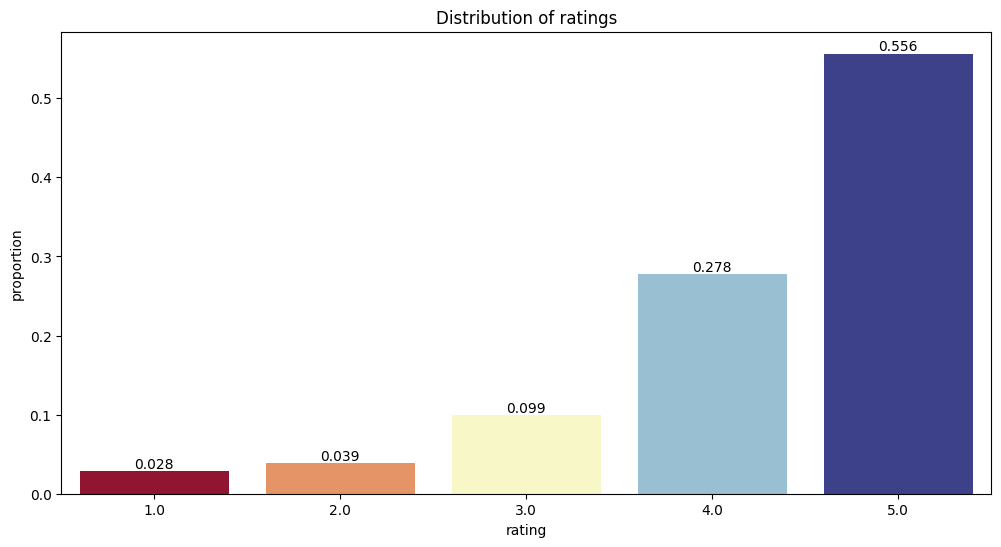

In [27]:
# Create the bar plot and provide observations
plt.figure(figsize=(12,6))

rating_dist_plot = sns.countplot(data=df_final, x='rating', hue='rating',
                                 stat='proportion', palette='RdYlBu',
                                 legend=False)

rating_dist_plot.set_title("Distribution of ratings") # Set title for the plot

# Let's display the rounded values on top of each bar
for i in rating_dist_plot.containers:
  rating_dist_plot.bar_label(i, fmt='%.3f') # format values to 3 decimals point

plt.show()

**Write your observations here:**
* The plot *confirms the skewness*, with **most of the ratings** sitting **between 4 and 5** (approximately **83%**, combined).
* This hints at the dataset being **biased towards high ratings**, which means our **models could be unbalanced**.
* There are no ratings equal to 0, the lowest rating being 1.

### **Checking the number of unique users and items in the dataset**

In [28]:
# Number of total rows in the data and number of unique user id and product id in the data
df_uniques = pd.DataFrame(
    columns=[
        'Total entries', 'Unique users', 'Unique products',
        'Maximum number of interactions'
    ]
)
df_uniques.loc[0] = [len(df_final),
     df_final['user_id'].nunique(),
     df_final['prod_id'].nunique(),
    df_final['user_id'].nunique() * df_final['prod_id'].nunique()]
df_uniques

,Total entries,Unique users,Unique products,Maximum number of interactions
0,65290,1540,5689,8761060


**Write your observations here:**
* There are **1,540 unique users**, and **5,689 unique products** in the dataset.
* As per the number of unqiue users and unique products, there is a **maximum possibility of 8,761,060 interactions**. Given that we "only" have 65,290 interactions recorded in our dataset, we can build a recomender system.
* There is an important sparsity in the number of interactions in this dataset where the total number of entries accounts for 0.7% of the maximum number of possible interactions.

### **Users with the most number of ratings**

In [30]:
# Top 10 users based on the number of ratings
df_final.groupby('user_id', as_index=False).rating.count().sort_values(by='rating',ascending=False).reset_index(drop=True).head(10)

,user_id,rating
0,ADLVFFE4VBT8,295
1,A3OXHLG6DIBRW8,230
2,A1ODOGXEYECQQ8,217
3,A36K2N527TXXJN,212
4,A25C2M3QF9G7OQ,203
5,A680RUE1FDO8B,196
6,A22CW0ZHY3NJH8,193
7,A1UQBFCERIP7VJ,193
8,AWPODHOB4GFWL,184
9,A3LGT6UZL99IW1,179


**Write your observations here:**
* Rating counts for the top 10 most frequent raters range from **179** for user A3LGT6UZL99IW1 to **295** for ADLVFFE4VBT8.

**Now that we have explored and prepared the data, let's build the first recommendation system.**

## **Model 1: Rank Based Recommendation System**

In [33]:
# Calculate the average rating for each product
average_rating = df_final.groupby('prod_id').rating.mean()

# Calculate the count of ratings for each product
rating_count = df_final.groupby('prod_id').rating.count()

# Create a dataframe with calculated average and count of ratings
final_rating = pd.DataFrame({'avg_rating': average_rating,
                             'rating_count': rating_count})

# Sort the dataframe by average of ratings in the descending order
final_rating = final_rating.sort_values(by=['avg_rating'], ascending=False)

# See the first five records of the "final_rating" dataset
final_rating.head(5)


,avg_rating,rating_count
prod_id,,
B00LGQ6HL8,5.0,5
B003DZJQQI,5.0,14
B005FDXF2C,5.0,7
B00I6CVPVC,5.0,7
B00B9KOCYA,5.0,8


In [34]:
# Defining a function to get the top n products based on the highest average rating and minimum interactions
def top_n_products(data, n, min_interactions=100):
# Finding products with minimum number of interactions
  recommendations = data[data['rating_count'] >= min_interactions]

# Sorting values with respect to average rating
  recommendations = recommendations.sort_values(by='avg_rating',
                                                ascending=False)
  return recommendations.head(n)


### **Recommending top 5 products with 50 minimum interactions based on popularity**

In [35]:
top_n_products(final_rating, 5, 50)

,avg_rating,rating_count
prod_id,,
B001TH7GUU,4.871795,78
B003ES5ZUU,4.864130,184
B0019EHU8G,4.855556,90
B006W8U2MU,4.824561,57
B000QUUFRW,4.809524,84


### **Recommending top 5 products with 100 minimum interactions based on popularity**

In [36]:
top_n_products(final_rating, 5, 100)

,avg_rating,rating_count
prod_id,,
B003ES5ZUU,4.864130,184
B000N99BBC,4.772455,167
B002WE6D44,4.770000,100
B007WTAJTO,4.701220,164
B002V88HFE,4.698113,106


We have recommended the **top 5** products by using the popularity recommendation system. Now, let's build a recommendation system using **collaborative filtering.**

## **Model 2: Collaborative Filtering Recommendation System**

### **Building a baseline user-user similarity based recommendation system**

- Below, we are building **similarity-based recommendation systems** using `cosine` similarity and using **KNN to find similar users** which are the nearest neighbor to the given user.  
- We will be using a new library, called `surprise`, to build the remaining models. Let's first import the necessary classes and functions from this library.

In [ ]:
# To compute the accuracy of models
from surprise import accuracy

# Class is used to parse a file containing ratings, data should be in structure - user ; item ; rating
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the rating data in train and test datasets
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# for implementing K-Fold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering

**Before building the recommendation systems, let's  go over some basic terminologies we are going to use:**

**Relevant item:** An item (product in this case) that is actually **rated higher than the threshold rating** is relevant, if the **actual rating is below the threshold then it is a non-relevant item**.  

**Recommended item:** An item that's **predicted rating is higher than the threshold is a recommended item**, if the **predicted rating is below the threshold then that product will not be recommended to the user**.  


**False Negative (FN):** It is the **frequency of relevant items that are not recommended to the user**. If the relevant items are not recommended to the user, then the user might not buy the product/item. This would result in the **loss of opportunity for the service provider**, which they would like to minimize.

**False Positive (FP):** It is the **frequency of recommended items that are actually not relevant**. In this case, the recommendation system is not doing a good job of finding and recommending the relevant items to the user. This would result in **loss of resources for the service provider**, which they would also like to minimize.

**Recall:** It is the **fraction of actually relevant items that are recommended to the user**, i.e., if out of 10 relevant products, 6 are recommended to the user then recall is 0.60. Higher the value of recall better is the model. It is one of the metrics to do the performance assessment of classification models.

**Precision:** It is the **fraction of recommended items that are relevant actually**, i.e., if out of 10 recommended items, 6 are found relevant by the user then precision is 0.60. The higher the value of precision better is the model. It is one of the metrics to do the performance assessment of classification models.

**While making a recommendation system, it becomes customary to look at the performance of the model. In terms of how many recommendations are relevant and vice-versa, below are some most used performance metrics used in the assessment of recommendation systems.**

### **Precision@k, Recall@ k, and F1-score@k**

**Precision@k** - It is the **fraction of recommended items that are relevant in `top k` predictions**. The value of k is the number of recommendations to be provided to the user. One can choose a variable number of recommendations to be given to a unique user.  


**Recall@k** - It is the **fraction of relevant items that are recommended to the user in `top k` predictions**.

**F1-score@k** - It is the **harmonic mean of Precision@k and Recall@k**. When **precision@k and recall@k both seem to be important** then it is useful to use this metric because it is representative of both of them.

### **Some useful functions**

- Below function takes the **recommendation model** as input and gives the **precision@k, recall@k, and F1-score@k** for that model.  
- To compute **precision and recall**, **top k** predictions are taken under consideration for each user.
- We will use the precision and recall to compute the F1-score.

In [37]:
def precision_recall_at_k(model, k = 10, threshold = 3.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user
    user_est_true = defaultdict(list)

    # Making predictions on the test data
    predictions = model.test(testset)

    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key = lambda x: x[0], reverse = True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. Therefore, we are setting Precision to 0 when n_rec_k is 0

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. Therefore, we are setting Recall to 0 when n_rel is 0

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    # Mean of all the predicted precisions are calculated.
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)

    # Mean of all the predicted recalls are calculated.
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)

    accuracy.rmse(predictions)

    print('Precision: ', precision) # Command to print the overall precision

    print('Recall: ', recall) # Command to print the overall recall

    f1 = round((2*precision*recall)/(precision+recall), 3) # Formula to compute the F-1 score
    print('F_1 score: ', f1)

    return (accuracy.rmse(predictions, verbose=False), precision, recall, f1) # Return the metrics, so that KY_ModelResults can capture them

**Hints:**

- To compute **precision and recall**, a **threshold of 3.5 and k value of 10 can be considered for the recommended and relevant ratings**.
- Think about the performance metric to choose.

Below we are loading the **`rating` dataset**, which is a **pandas DataFrame**, into a **different format called `surprise.dataset.DatasetAutoFolds`**, which is required by this library. To do this, we will be **using the classes `Reader` and `Dataset`.**

In [38]:
# Instantiating Reader scale with expected rating scale
reader = Reader(rating_scale=(0, 5))

# Loading the rating dataset
datas = Dataset.load_from_df(df_final[['user_id', 'prod_id', 'rating']], reader)

# Splitting the data into train and test datasets
trainset, testset = train_test_split(datas, test_size=0.20, random_state=1)

Now, we are **ready to build the first baseline similarity-based recommendation system** using the cosine similarity.

### **Building the user-user Similarity-based Recommendation System**

In [39]:
# Declaring the similarity options
sim_options = {
    'name': 'cosine',
    'user_based': True
}

# Initialize the KNNBasic model using sim_options declared, Verbose = False, and setting random_state = 1
sim_user_user = KNNBasic(sim_options=sim_options, random_state=1,
                         verbose=False)

# Fit the model on the training data
sim_user_user.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score using the precision_recall_at_k function defined above
model_results.add_prf1('sim_user_user', precision_recall_at_k(sim_user_user))

RMSE: 1.0260
Precision:  0.844
Recall:  0.862
F_1 score:  0.853


**Write your observations here:**
* In our model, we want to **minimize both false positives and false negatives**, so we want to **maximize our F_1 score**.
* The **precision** of our model is high, at **84.4%**. This indicates that a high number of predictions are true positives.
* **Recall** is also high, at **86.2%**. This indicates that, among all the relevant products, 86.2% are recommended.
* **F_1 score** is also very high, at **0.853**.  It indicates that **mostly recommended products were relevant and relevant products were recommended**.<br>
However, we will try to improve this score through hyperparameter tuning.

Let's now **predict rating for a user with `userId=A3LDPF5FMB782Z` and `productId=1400501466`** as shown below. Here the user has already interacted or watched the product with productId '1400501466' and given a rating of 5.

In [40]:
# Predicting rating for a sample user with an interacted product
model_results.add_pred('sim_user_user', sim_user_user.predict('A3LDPF5FMB782Z', '1400501466', r_ui=5, verbose=True))

user: A3LDPF5FMB782Z item: 1400501466 r_ui = 5.00   est = 3.33   {'actual_k': 6, 'was_impossible': False}


**Write your observations here:**
* Our baseline model has **predicted** a rating of **3.33** while the **actual rating** is **5**.

Below is the function to find the **list of users who have not seen the product with product id "1400501466"**.

In [42]:
def n_users_not_interacted_with(n, data, prod_id):
    users_interacted_with_product = set(data[data['prod_id'] == prod_id]['user_id'])
    all_users = set(data['user_id'])
    return list(all_users.difference(users_interacted_with_product))[:n] # where n is the number of elements to get in the list

In [43]:
# Find unique user_id where prod_id is not equal to "1400501466"
n_users_not_interacted_with(5, df_final, '1400501466')

['A2WA8TDCTGUADI',
 'ALDAF4VVLFRHP',
 'AGXMC3ITWZASE',
 'A1Y4EWMUTW73GD',
 'A38CHSS1ZAE51B']

* It can be observed from the above list that **user "A2Y3WWPUKIJ59I" has not seen the product with productId "1400501466"** as this user id is a part of the above list

**Below we are predicting rating for `userId=A2Y3WWPUKIJ59I` and `prod_id=1400501466`.**

In [44]:
# Predicting rating for a sample user with a non interacted product
model_results.add_pred('sim_user_user',
                       sim_user_user.predict(
                           'A2Y3WWPUKIJ59I', '1400501466', verbose=True))

user: A2Y3WWPUKIJ59I item: 1400501466 r_ui = None   est = 3.00   {'actual_k': 1, 'was_impossible': False}


**Observations:**
* Our baseline model predicts a rating of **3.33**.
* Only one neigbor could be found, in order to make the prediction.

In [45]:
# Because the notebook originally asked to predict rating for sample user
# A2UOHALGF2X77Q, we will check that this user has indeed never seen the
# product, and we will predict the rating.

if 'A2UOHALGF2X77Q' in n_users_not_interacted_with(-1, df_final, '1400501466'):
  model_results.add_pred('sim_user_user',
                         sim_user_user.predict(
                             'A2UOHALGF2X77Q', '1400501466', verbose=True))

user: A2UOHALGF2X77Q item: 1400501466 r_ui = None   est = 4.34   {'actual_k': 3, 'was_impossible': False}


**Observations:**
* Here the predicted rating is **4.34**.
* The model could find 3 neighbors to make its prediction.

In [46]:
model_results.show()

,Model Name,Type,Data
0,sim_user_user,ResultType.PRF1,"(1.0260015544262915, 0.844, 0.862, 0.853)"
1,sim_user_user,ResultType.PRED,"(A3LDPF5FMB782Z, 1400501466, 5, 3.3333333333333335, {'actual_k': 6, 'was_impossible': False})"
2,sim_user_user,ResultType.PRED,"(A2Y3WWPUKIJ59I, 1400501466, None, 3.0, {'actual_k': 1, 'was_impossible': False})"
3,sim_user_user,ResultType.PRED,"(A2UOHALGF2X77Q, 1400501466, None, 4.3355875039423895, {'actual_k': 3, 'was_impossible': False})"


**Write your observations here:**
* The **predicted rating for this user-item pair is 3**, based on our baseline user-user similarity model.
* Only 1 neighbor was found by the model to make the prediction.

### **Improving similarity-based recommendation system by tuning its hyperparameters**

Below, we will be tuning hyperparameters for the `KNNBasic` algorithm. Let's try to understand some of the hyperparameters of the KNNBasic algorithm:

- **k** (int) – The (max) number of neighbors to take into account for aggregation. Default is 40.
- **min_k** (int) – The minimum number of neighbors to take into account for aggregation. If there are not enough neighbors, the prediction is set to the global mean of all ratings. Default is 1.
- **sim_options** (dict) – A dictionary of options for the similarity measure. And there are four similarity measures available in surprise -
    - cosine
    - msd (default)
    - Pearson
    - Pearson baseline

In [47]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {
    'k': [10, 20, 30],
    'min_k': [3, 6, 9],
    'sim_options': {
        'name': ['msd', 'cosine', 'pearson', 'pearson_baseline'],
        'user_based': [True],
        'min_support': [2,4,6]
    }
}
# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid=param_grid, measures=['rmse'], cv=3,
                  n_jobs=-1)

# Fitting the data
gs.fit(datas)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

0.9805670733296666
{'k': 30, 'min_k': 3, 'sim_options': {'name': 'cosine', 'user_based': True, 'min_support': 2}}


Once the grid search is **complete**, we can get the **optimal values for each of those hyperparameters**.

Now, let's build the **final model by using tuned values of the hyperparameters**, which we received by using **grid search cross-validation**.

In [48]:
# Using the optimal similarity measure for user-user based collaborative filtering
sim_options = {
    'name': 'cosine',
    'user_based': True,
    'min_support': 2
}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_user_user_optimized = KNNBasic(
    k=30,
    min_k=3,
    sim_options=sim_options,
    random_state=1,
    verbose=False,
    )

# Training the algorithm on the trainset
sim_user_user_optimized.fit(trainset)

# Let us compute precision@k and recall@k also with k =10
model_results.add_prf1('sim_user_user_optimized',
                       precision_recall_at_k(sim_user_user_optimized))

RMSE: 0.9846
Precision:  0.836
Recall:  0.895
F_1 score:  0.864


In [49]:
model_results.show()[model_results.show()['Type'] == model_results.ResultType.PRF1]

,Model Name,Type,Data
0,sim_user_user,ResultType.PRF1,"(1.0260015544262915, 0.844, 0.862, 0.853)"
4,sim_user_user_optimized,ResultType.PRF1,"(0.9846389881220419, 0.836, 0.895, 0.864)"


**Write your observations here:**
* Precision is lower, however **recall** has **improved**. The **F_1 score** has **improved, as has the RMSE** (lower than with our baseline user-user similarity baseline model), which confirms that the **model has improved**.

### **Steps:**
- **Predict rating for the user with `userId="A3LDPF5FMB782Z"`, and `prod_id= "1400501466"` using the optimized model**
- **Predict rating for `userId="A2UOHALGF2X77Q"` who has not interacted with `prod_id ="1400501466"`, by using the optimized model**
- **Compare the output with the output from the baseline model**

In [50]:
# Use sim_user_user_optimized model to recommend for userId "A3LDPF5FMB782Z" and productId 1400501466
model_results.add_pred('sim_user_user_optimized',
                       sim_user_user_optimized.predict(
                           'A3LDPF5FMB782Z', '1400501466', r_ui=5,
                           verbose=True
                       ))

user: A3LDPF5FMB782Z item: 1400501466 r_ui = 5.00   est = 4.30   {'was_impossible': True, 'reason': 'Not enough neighbors.'}


In [51]:
# Use sim_user_user_optimized model to recommend for userId "A2Y3WWPUKIJ59I" and productId "1400501466"
model_results.add_pred('sim_user_user_optimized',
                       sim_user_user_optimized.predict(
                           'A2Y3WWPUKIJ59I', '1400501466',
                           verbose=True
                       ))

user: A2Y3WWPUKIJ59I item: 1400501466 r_ui = None   est = 4.30   {'was_impossible': True, 'reason': 'Not enough neighbors.'}


In [52]:
# Use sim_user_user_optimized model to recommend for userId "A2UOHALGF2X77Q" and productId "1400501466"
model_results.add_pred('sim_user_user_optimized',
                       sim_user_user_optimized.predict(
                           'A2UOHALGF2X77Q', '1400501466',
                           verbose=True
                       ))

user: A2UOHALGF2X77Q item: 1400501466 r_ui = None   est = 4.30   {'was_impossible': True, 'reason': 'Not enough neighbors.'}


In [53]:
model_results.show()[model_results.show()['Type'] == model_results.ResultType.PRED]

,Model Name,Type,Data
1,sim_user_user,ResultType.PRED,"(A3LDPF5FMB782Z, 1400501466, 5, 3.3333333333333335, {'actual_k': 6, 'was_impossible': False})"
2,sim_user_user,ResultType.PRED,"(A2Y3WWPUKIJ59I, 1400501466, None, 3.0, {'actual_k': 1, 'was_impossible': False})"
3,sim_user_user,ResultType.PRED,"(A2UOHALGF2X77Q, 1400501466, None, 4.3355875039423895, {'actual_k': 3, 'was_impossible': False})"
5,sim_user_user_optimized,ResultType.PRED,"(A3LDPF5FMB782Z, 1400501466, 5, 4.296427477408486, {'was_impossible': True, 'reason': 'Not enough neighbors.'})"
6,sim_user_user_optimized,ResultType.PRED,"(A2Y3WWPUKIJ59I, 1400501466, None, 4.296427477408486, {'was_impossible': True, 'reason': 'Not enough neighbors.'})"
7,sim_user_user_optimized,ResultType.PRED,"(A2UOHALGF2X77Q, 1400501466, None, 4.296427477408486, {'was_impossible': True, 'reason': 'Not enough neighbors.'})"


**Write your observations here:**
* In the three cases, the model indicates an **insufficient number of neighbors** and defaults to the **global mean** which is **4.30**

### **Identifying similar users to a given user (nearest neighbors)**

We can also find out **similar users to a given user** or its **nearest neighbors** based on this KNNBasic algorithm. Below, we are finding the 5 most similar users to our sample users, based on the `cosine` distance metric.

In [54]:
sample_users = ['A3LDPF5FMB782Z', 'A2Y3WWPUKIJ59I', 'A2UOHALGF2X77Q'] # List of sample users
for sample_user in sample_users:
  # For each sample user we've chosen, find the 5 nearest neighbors,
  # based on the KNNBasic algorithm. For each neighbor, return their original
  # user_id, followed by the ID internal to the surprise library.
  print(f'Nearest neighbors for user {sample_user}: ',
        [f'{sim_user_user_optimized.trainset.to_raw_uid(inner_user)} ({inner_user})' for inner_user in sim_user_user_optimized.get_neighbors(
      sim_user_user_optimized.trainset.to_inner_uid(sample_user), 5)])

Nearest neighbors for user A3LDPF5FMB782Z:  ['A2NSMJVQY0RV9S (57)', 'A1NGFGBX2VCQS8 (200)', 'A2UOHALGF2X77Q (264)', 'A3QDY9I0CNMD2W (310)', 'A3Q4TYJVAM4IRM (360)']
Nearest neighbors for user A2Y3WWPUKIJ59I:  ['A39137LW12KK7B (28)', 'A12DQZKRKTNF5E (32)', 'A28UMA3GW9L124 (41)', 'AOEAD7DPLZE53 (73)', 'AMO1MLSIJSQOF (102)']
Nearest neighbors for user A2UOHALGF2X77Q:  ['A2RN2AO4BE6F4K (6)', 'A3DOPYDOS49I3T (12)', 'ACJT8MUC0LRF0 (19)', 'ACY9QYNDFLVBI (33)', 'A2T3S3VTW65VO5 (54)']


### **Implementing the recommendation algorithm based on optimized KNNBasic model**

Below we will be implementing a function where the input parameters are:

- data: A **rating** dataset
- user_id: A user id **against which we want the recommendations**
- top_n: The **number of products we want to recommend**
- algo: the algorithm we want to use **for predicting the ratings**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [55]:
def get_recommendations(data, user_id, top_n, algo):

    # Creating an empty list to store the recommended product ids
    recommendations = []

    # Creating an user item interactions matrix
    user_item_interactions_matrix = data.pivot(index = 'user_id', columns = 'prod_id', values = 'rating')

    # Extracting those product ids which the user_id has not interacted yet
    non_interacted_products = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()

    # Looping through each of the product ids which user_id has not interacted yet
    for item_id in non_interacted_products:

        # Predicting the ratings for those non interacted product ids by this user
        est = algo.predict(user_id, item_id).est

        # Appending the predicted ratings
        recommendations.append((item_id, est))

    # Sorting the predicted ratings in descending order
    recommendations.sort(key = lambda x: x[1], reverse = True)

    return recommendations[:top_n] # Returing top n highest predicted rating products for this user

**Predicting top 5 products for userId = "A3LDPF5FMB782Z" with similarity based recommendation system**

In [56]:
# Making top 5 recommendations for user_id "A3LDPF5FMB782Z" with a similarity-based recommendation engine
recommendations = get_recommendations(df_final, "A3LDPF5FMB782Z", 5, sim_user_user_optimized)

In [57]:
# Building the dataframe for above recommendations with columns "prod_id" and "predicted_ratings"
pd.DataFrame(recommendations, columns=["prod_id", "predicted_ratings"])

,prod_id,predicted_ratings
0,B001ENW61I,5
1,B002WE4HE2,5
2,B002WE6D44,5
3,B003D5MY5I,5
4,B0052SCU8U,5


### **Item-Item Similarity-based Collaborative Filtering Recommendation System**

* Above we have seen **similarity-based collaborative filtering** where similarity is calculated **between users**. Now let us look into similarity-based collaborative filtering where similarity is seen **between items**.

In [58]:
# Declaring the similarity options
sim_options = {
    'name': 'cosine',
    'user_based': False
}

# KNN algorithm is used to find desired similar items. Use random_state=1
sim_item_item = KNNBasic(sim_options=sim_options, random_state=1,
                         verbose=False)

# Train the algorithm on the trainset, and predict ratings for the test set
sim_item_item.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10
model_results.add_prf1('sim_item_item',
                       precision_recall_at_k(sim_item_item))

RMSE: 1.0147
Precision:  0.826
Recall:  0.853
F_1 score:  0.839


**Write your observations here:**
* The precision of this model is high: 82.6%, which indicates that a high number of predictions are true positives.
* Recall is also high: 85.3%
* The **F_1 score** is high (0.839), whcich indicates good performance. Once again, we will try to improve our score through through hyperparameter tuning.

Let's now **predict a rating for a user with `userId = A3LDPF5FMB782Z` and `prod_Id = 1400501466`** as shown below. Here the user has already interacted or watched the product with productId "1400501466".

In [59]:
# Predicting rating for a sample user with an interacted product
model_results.add_pred('sim_item_item',
                       sim_item_item.predict('A3LDPF5FMB782Z', '1400501466',
                                             r_ui=5, verbose=True))

user: A3LDPF5FMB782Z item: 1400501466 r_ui = 5.00   est = 4.30   {'actual_k': 20, 'was_impossible': False}


**Write your observations here:**
The model predicts a rating of 4.3 while the actual rating is 5 for this user and product.

Below we are **predicting rating for the `userId = A2Y3WWPUKIJ59I` and `prod_id = 1400501466`**.

In [60]:
model_results.add_pred('sim_item_item',
                       sim_item_item.predict('A2Y3WWPUKIJ59I', '1400501466',
                                             verbose=True))

user: A2Y3WWPUKIJ59I item: 1400501466 r_ui = None   est = 4.00   {'actual_k': 3, 'was_impossible': False}


**Observations:**
* Here the model predicts a rating of **4** for this product that hasn't been seen by the user.

Below we are **predicting rating for the `userId = A2UOHALGF2X77Q` and `prod_id = 1400501466`**.

In [61]:
# Predicting rating for a sample user with a non interacted product
model_results.add_pred('sim_item_item',
                       sim_item_item.predict('A2UOHALGF2X77Q', '1400501466',
                                             verbose=True))

user: A2UOHALGF2X77Q item: 1400501466 r_ui = None   est = 4.67   {'actual_k': 6, 'was_impossible': False}


**Write your observations here:**
* Here the model predicts a rating of **4.67** for this product that hasn't been seen by the user.

### **Hyperparameter tuning the item-item similarity-based model**
- Use the following values for the param_grid and tune the model.
  - 'k': [10, 20, 30]
  - 'min_k': [3, 6, 9]
  - 'sim_options': {'name': ['msd', 'cosine']
  - 'user_based': [False]
- Use GridSearchCV() to tune the model using the 'rmse' measure
- Print the best score and best parameters

In [63]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {
    'k': [10, 20, 30],
    'min_k': [3, 6, 9],
    'sim_options': {
        'name': ['cosine', 'msd'],
        'user_based': [False],
        'min_support': [2, 4]
    }
}
# Performing 3-fold cross validation to tune the hyperparameters
gs_ii = GridSearchCV(KNNBasic, param_grid=param_grid, measures=['rmse'], cv=3,
                     n_jobs=-1)

# Fitting the data
gs_ii.fit(datas)

# Find the best RMSE score
print(gs_ii.best_score['rmse'])

# Find the combination of parameters that gave the best RMSE score
print(gs_ii.best_params['rmse'])


0.985113993043898
{'k': 20, 'min_k': 6, 'sim_options': {'name': 'msd', 'user_based': False, 'min_support': 2}}


Once the **grid search** is complete, we can get the **optimal values for each of those hyperparameters as shown above.**

Now let's build the **final model** by using **tuned values of the hyperparameters** which we received by using grid search cross-validation.

### **Use the best parameters from GridSearchCV to build the optimized item-item similarity-based model. Compare the performance of the optimized model with the baseline model.**

In [64]:
# Using the optimal similarity measure for item-item based collaborative filtering
sim_options = {
    'name': 'msd',
    'user_based': False,
    'min_support': 2
}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_item_item_optimized = KNNBasic(sim_options=sim_options, random_state=1,
                                   k=20, min_k=6)

# Training the algorithm on the trainset
sim_item_item_optimized.fit(trainset)

# Let us compute precision@k and recall@k, f1_score and RMSE
model_results.add_prf1('sim_item_item_optimized',
                       precision_recall_at_k(sim_item_item_optimized))

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9913
Precision:  0.828
Recall:  0.899
F_1 score:  0.862


In [65]:
model_results.show()[(model_results.show()['Type'] == model_results.ResultType.PRF1) & (model_results.show()['Model Name'].str.startswith('sim_item_item'))]

,Model Name,Type,Data
8,sim_item_item,ResultType.PRF1,"(1.0146859430974449, 0.826, 0.853, 0.839)"
12,sim_item_item_optimized,ResultType.PRF1,"(0.9913239891706099, 0.828, 0.899, 0.862)"


**Write your observations here:**
* Model performance has increased across all metrics.

### **Steps:**
- **Predict rating for the user with `userId="A3LDPF5FMB782Z"`, and `prod_id= "1400501466"` using the optimized model**
- **Predict rating for `userId="A2UOHALGF2X77Q"` who has not interacted with `prod_id ="1400501466"`, by using the optimized model**
- **Compare the output with the output from the baseline model**

In [66]:
# Use sim_item_item_optimized model to recommend for userId "A3LDPF5FMB782Z" and productId "1400501466"
model_results.add_pred('sim_item_item_optimized',
                       sim_item_item_optimized.predict('A3LDPF5FMB782Z',
                                                       '1400501466',
                                                       r_ui=5,
                                                       verbose=True))

user: A3LDPF5FMB782Z item: 1400501466 r_ui = 5.00   est = 4.30   {'was_impossible': True, 'reason': 'Not enough neighbors.'}


In [67]:
# Use sim_item_item_optimized model to recommend for userId "A2Y3WWPUKIJ59I" and productId "1400501466"
model_results.add_pred('sim_item_item_optimized',
                       sim_item_item_optimized.predict('A2Y3WWPUKIJ59I',
                                                       '1400501466',
                                                       verbose=True))

user: A2Y3WWPUKIJ59I item: 1400501466 r_ui = None   est = 4.30   {'was_impossible': True, 'reason': 'Not enough neighbors.'}


In [68]:
# Use sim_item_item_optimized model to recommend for userId "A2UOHALGF2X77Q" and productId "1400501466"
model_results.add_pred('sim_item_item_optimized',
                       sim_item_item_optimized.predict('A2UOHALGF2X77Q',
                                                       '1400501466',
                                                       verbose=True))

user: A2UOHALGF2X77Q item: 1400501466 r_ui = None   est = 4.30   {'was_impossible': True, 'reason': 'Not enough neighbors.'}


**Write your observations here:**
* This model assigns the global mean of 4.30 as these entries do not have enough neighbors.

### **Identifying similar items to a given item (nearest neighbors)**

We can also find out **similar items** to a given item or its nearest neighbors based on this **KNNBasic algorithm**. Below we are finding the 5 most similar items to the sample item based on the `msd` distance metric.

In [69]:
[f'{sim_item_item_optimized.trainset.to_raw_iid(inner_item)} ({inner_item})' for inner_item in sim_item_item_optimized.get_neighbors(
      sim_item_item_optimized.trainset.to_inner_iid('1400501466'), 5)]

['B00AGAS6XW (728)',
 'B008U3038I (1394)',
 'B000KO0GY6 (0)',
 'B000067VBL (1)',
 'B0009VT9OS (2)']

**Predicting top 5 products for userId = "A1A5KUIIIHFF4U" with similarity based recommendation system.**

**Hint:** Use the get_recommendations() function.

In [70]:
# Making top 5 recommendations for user_id A1A5KUIIIHFF4U with similarity-based recommendation engine.
ii_recommendations = get_recommendations(df_final, 'A1A5KUIIIHFF4U', 5, sim_item_item_optimized)

In [71]:
# Building the dataframe for above recommendations with columns "prod_id" and "predicted_ratings"
pd.DataFrame(ii_recommendations, columns=["prod_id", "predicted_ratings"])

,prod_id,predicted_ratings
0,1400532655,4.296427
1,1400599997,4.296427
2,9983891212,4.296427
3,B00000DM9W,4.296427
4,B00000J1V5,4.296427


In [72]:
# Making top 5 recommendations for user_id A1A5KUIIIHFF4U with baseline similarity-based recommendation engine.
ii_bs_recommendations = get_recommendations(df_final, 'A1A5KUIIIHFF4U', 5, sim_item_item)

In [73]:
# Building the dataframe for above recommendations with columns "prod_id" and "predicted_ratings"
pd.DataFrame(ii_bs_recommendations, columns=["prod_id", "predicted_ratings"])

,prod_id,predicted_ratings
0,B00000DM9W,5
1,B00000J1V5,5
2,B00000K135,5
3,B00000K4KH,5
4,B00001WRSJ,5


**Observations:**
* Although the tuned, **optimized item-item similarity** evaluates to **better metrics**, it is **unable to find nearest neighbors** to make predictions for the sample user we have chosen.
* It appears the **baseline item-item similarity model** is able to **find neighbors** to make predictions for this user. We will choose the baseline model for our predictions if we really need to use item-item similarity filtering.

Now as we have seen **similarity-based collaborative filtering algorithms**, let us now get into **model-based collaborative filtering algorithms**.

### **Model 3: Model-Based Collaborative Filtering - Matrix Factorization**

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

### Singular Value Decomposition (SVD)

SVD is used to **compute the latent features** from the **user-item matrix**. But SVD does not work when we **miss values** in the **user-item matrix**.

In [74]:
# Using SVD matrix factorization. Use random_state = 1
svd = SVD(random_state=1)

# Training the algorithm on the trainset
svd.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
model_results.add_prf1('svd', precision_recall_at_k(svd))

RMSE: 0.9104
Precision:  0.837
Recall:  0.88
F_1 score:  0.858


In [75]:
model_results.show()[(model_results.show()['Type'] == model_results.ResultType.PRF1) & (~model_results.show()['Model Name'].str.contains('optimized'))]

,Model Name,Type,Data
0,sim_user_user,ResultType.PRF1,"(1.0260015544262915, 0.844, 0.862, 0.853)"
8,sim_item_item,ResultType.PRF1,"(1.0146859430974449, 0.826, 0.853, 0.839)"
16,svd,ResultType.PRF1,"(0.9104313015007229, 0.837, 0.88, 0.858)"


**Write your observations here:**
* The performance of the model is good accross all the metrics. The RMSE is lower than with all previous baseline models.
* The F_1 score, in particular, is higher than with the previous baseline models.

**Let's now predict the rating for a user with `userId = "A3LDPF5FMB782Z"` and `prod_id = "1400501466`.**

In [76]:
# Making prediction
model_results.add_pred('svd', svd.predict('A3LDPF5FMB782Z', '1400501466',
                                          r_ui=5, verbose=True))

user: A3LDPF5FMB782Z item: 1400501466 r_ui = 5.00   est = 4.09   {'was_impossible': False}


**Write your observations here:**
* The model predicts a value of **4.09** while the actual rating is **5**.

**Let's now predict the rating for a user with `userId = "A2Y3WWPUKIJ59I"` and `prod_id = "1400501466`.**

In [77]:
model_results.add_pred('svd', svd.predict('A2Y3WWPUKIJ59I', '1400501466',
                                          verbose=True))

user: A2Y3WWPUKIJ59I item: 1400501466 r_ui = None   est = 3.54   {'was_impossible': False}


**Observations:**
The model predicts a value of **3.54**

**Below we are predicting rating for the `userId = "A2UOHALGF2X77Q"` and `productId = "1400501466"`.**

In [78]:
# Making prediction
model_results.add_pred('svd', svd.predict('A2UOHALGF2X77Q', '1400501466',
                                          verbose=True))

user: A2UOHALGF2X77Q item: 1400501466 r_ui = None   est = 4.08   {'was_impossible': False}


**Write your observations here:**
* Here, the model predicts a rating value of **4.08**

In [79]:
model_results.show()[(model_results.show()['Type'] == model_results.ResultType.PRED)]

,Model Name,Type,Data
1,sim_user_user,ResultType.PRED,"(A3LDPF5FMB782Z, 1400501466, 5, 3.3333333333333335, {'actual_k': 6, 'was_impossible': False})"
2,sim_user_user,ResultType.PRED,"(A2Y3WWPUKIJ59I, 1400501466, None, 3.0, {'actual_k': 1, 'was_impossible': False})"
3,sim_user_user,ResultType.PRED,"(A2UOHALGF2X77Q, 1400501466, None, 4.3355875039423895, {'actual_k': 3, 'was_impossible': False})"
5,sim_user_user_optimized,ResultType.PRED,"(A3LDPF5FMB782Z, 1400501466, 5, 4.296427477408486, {'was_impossible': True, 'reason': 'Not enough neighbors.'})"
6,sim_user_user_optimized,ResultType.PRED,"(A2Y3WWPUKIJ59I, 1400501466, None, 4.296427477408486, {'was_impossible': True, 'reason': 'Not enough neighbors.'})"
7,sim_user_user_optimized,ResultType.PRED,"(A2UOHALGF2X77Q, 1400501466, None, 4.296427477408486, {'was_impossible': True, 'reason': 'Not enough neighbors.'})"
9,sim_item_item,ResultType.PRED,"(A3LDPF5FMB782Z, 1400501466, 5, 4.3, {'actual_k': 20, 'was_impossible': False})"
10,sim_item_item,ResultType.PRED,"(A2Y3WWPUKIJ59I, 1400501466, None, 4.0, {'actual_k': 3, 'was_impossible': False})"
11,sim_item_item,ResultType.PRED,"(A2UOHALGF2X77Q, 1400501466, None, 4.666666666666667, {'actual_k': 6, 'was_impossible': False})"
13,sim_item_item_optimized,ResultType.PRED,"(A3LDPF5FMB782Z, 1400501466, 5, 4.296427477408486, {'was_impossible': True, 'reason': 'Not enough neighbors.'})"


### **Improving Matrix Factorization based recommendation system by tuning its hyperparameters**

Below we will be tuning only three hyperparameters:
- **n_epochs**: The number of iterations of the SGD algorithm.
- **lr_all**: The learning rate for all parameters.
- **reg_all**: The regularization term for all parameters.

In [82]:
# Set the parameter space to tune
param_grid = {
    'n_epochs': [10, 20, 30],
    'lr_all': [0.001, 0.005],
    'reg_all': [0.02, 0.2, 0.4, 0.6]
}

# Performing 3-fold gridsearch cross-validation
svd_gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3, n_jobs=-1)

# Fitting data
svd_gs.fit(datas)

# Best RMSE score
print(svd_gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(svd_gs.best_params['rmse'])

0.8998761874395944
{'n_epochs': 30, 'lr_all': 0.005, 'reg_all': 0.4}


Now, we will **build the final model** by using **tuned values** of the hyperparameters, which we received using grid search cross-validation above.

In [85]:
# Build the optimized SVD model using optimal hyperparameter search. Use random_state=1
svd_optimized = SVD(n_epochs=30, lr_all=0.005, reg_all=0.4, random_state=1)

# Train the algorithm on the trainset
svd_optimized.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
model_results.add_prf1('svd_optimized', precision_recall_at_k(svd_optimized))

RMSE: 0.9035
Precision:  0.838
Recall:  0.89
F_1 score:  0.863


In [86]:
model_results.show()[model_results.show()['Type'] == model_results.ResultType.PRF1]

,Model Name,Type,Data
0,sim_user_user,ResultType.PRF1,"(1.0260015544262915, 0.844, 0.862, 0.853)"
4,sim_user_user_optimized,ResultType.PRF1,"(0.9846389881220419, 0.836, 0.895, 0.864)"
8,sim_item_item,ResultType.PRF1,"(1.0146859430974449, 0.826, 0.853, 0.839)"
12,sim_item_item_optimized,ResultType.PRF1,"(0.9913239891706099, 0.828, 0.899, 0.862)"
16,svd,ResultType.PRF1,"(0.9104313015007229, 0.837, 0.88, 0.858)"
20,svd_optimized,ResultType.PRF1,"(0.903471436576928, 0.838, 0.89, 0.863)"


**Write your observations here:**
* The model has lower RMSE (even the lower RMSE of all models tested), its precision is slighlty higher than the baseline model's, as well as higer recall and F1_score.

### **Steps:**
- **Predict rating for the user with `userId="A3LDPF5FMB782Z"`, and `prod_id= "1400501466"` using the optimized model**
- **Predict rating for `userId="A2UOHALGF2X77Q"` who has not interacted with `prod_id ="1400501466"`, by using the optimized model**
- **Compare the output with the output from the baseline model**

In [87]:
# Use svd_algo_optimized model to recommend for userId "A3LDPF5FMB782Z" and productId "1400501466"
model_results.add_pred('svd_optimized',
                       svd_optimized.predict('A3LDPF5FMB782Z', '1400501466',
                                             r_ui=5, verbose=True))

user: A3LDPF5FMB782Z item: 1400501466 r_ui = 5.00   est = 4.01   {'was_impossible': False}


In [88]:
# Use svd_algo_optimized model to recommend for userId "A2Y3WWPUKIJ59I" and productId "1400501466"
model_results.add_pred('svd_optimized',
                       svd_optimized.predict('A2Y3WWPUKIJ59I', '1400501466',
                                             verbose=True))

user: A2Y3WWPUKIJ59I item: 1400501466 r_ui = None   est = 3.66   {'was_impossible': False}


In [89]:
# Use svd_algo_optimized model to recommend for userId "A2UOHALGF2X77Q" and productId "1400501466"
model_results.add_pred('svd_optimized',
                       svd_optimized.predict('A2UOHALGF2X77Q', '1400501466',
                                             verbose=True))

user: A2UOHALGF2X77Q item: 1400501466 r_ui = None   est = 3.92   {'was_impossible': False}


In [90]:
model_results.show()

,Model Name,Type,Data
0,sim_user_user,ResultType.PRF1,"(1.0260015544262915, 0.844, 0.862, 0.853)"
1,sim_user_user,ResultType.PRED,"(A3LDPF5FMB782Z, 1400501466, 5, 3.3333333333333335, {'actual_k': 6, 'was_impossible': False})"
2,sim_user_user,ResultType.PRED,"(A2Y3WWPUKIJ59I, 1400501466, None, 3.0, {'actual_k': 1, 'was_impossible': False})"
3,sim_user_user,ResultType.PRED,"(A2UOHALGF2X77Q, 1400501466, None, 4.3355875039423895, {'actual_k': 3, 'was_impossible': False})"
4,sim_user_user_optimized,ResultType.PRF1,"(0.9846389881220419, 0.836, 0.895, 0.864)"
5,sim_user_user_optimized,ResultType.PRED,"(A3LDPF5FMB782Z, 1400501466, 5, 4.296427477408486, {'was_impossible': True, 'reason': 'Not enough neighbors.'})"
6,sim_user_user_optimized,ResultType.PRED,"(A2Y3WWPUKIJ59I, 1400501466, None, 4.296427477408486, {'was_impossible': True, 'reason': 'Not enough neighbors.'})"
7,sim_user_user_optimized,ResultType.PRED,"(A2UOHALGF2X77Q, 1400501466, None, 4.296427477408486, {'was_impossible': True, 'reason': 'Not enough neighbors.'})"
8,sim_item_item,ResultType.PRF1,"(1.0146859430974449, 0.826, 0.853, 0.839)"
9,sim_item_item,ResultType.PRED,"(A3LDPF5FMB782Z, 1400501466, 5, 4.3, {'actual_k': 20, 'was_impossible': False})"


**Observations:**
* The predictions from our optimized SVD model predict lower ratings than the baseline, but they remain quite close to them.
* Our optimized SVD model did not have any issue predicting ratings for the sample users we tried.

In [92]:
pd.DataFrame(get_recommendations(df_final, 'A1A5KUIIIHFF4U', 5, svd_optimized), columns=['prod_id', 'exprected_ratings'])

,prod_id,exprected_ratings
0,B00007E89K,4.211223
1,B00FR6VL50,4.195579
2,B002NO7PWC,4.190934
3,B00009EHJV,4.190026
4,B0009YDP7W,4.184403


**Observations:**
* Our optimized SVD model successfully recommends items without resorting to the global mean.

### **Conclusion and Recommendations**

* We have built recommender models using the following strategies:
  * Rank-based using averages
  * User-user-similarity-based collaborative filtering
  * Item-item-similarity-based collaborative filtering
  * Model-based colaborative filtering (Matrix-factorization)

* We haven't experienced with _clustering-based recommendation_.
* We have chosen to optimize both precision@k and recall@k, by **maximizing the F_1 score**.
* With all these approaches we have used **hyperparameter tuning** using grid search cross-validation **to optimize model performance**.
* Unfortunately, although all models have presented good performance in regards to precision, recall and F_1 score, some of the optimized models have shown to have predicted poorly on our sample users and item.
* The **optimized item-item collaborative filtering model has constantly resorted to the global mean**, because of its inability to locate any nearest neighbors.
*  The **optimized user-user collaborative filtering model** has achieved the **highest F_1 score**. It has been shown to have difficulties predicting ratings on our sample users.
* The **optimized SVD model** has achieved the **lowest RMSE** and is **a close second** to the optimized user-user collaborative model when it comes to **F_1 score**, the metric we have chosen to maximize.
* The good performance and results from our optimized SVD model may result from the ability of matrix factorization to account for latent factors.
<br>
**Recommendations and proposal for the final solution design:**
* **Although the optimized user-user-similarity-based collaborative filtering model has achieved the highest F1_ score**, we recommend using the **optimized Model-Based collaborative filtering model as the final solution**, as its **F_1 score is very close** to the that of the optimized user-user-similarity-based collaborative filtering model, and **it has not shown any issue in predicting ratings**, even though the predicted ratings tend to be inferior to actual ratings in our tests.
* It could be beneficial to research into clustering-based recommendation.
* As recommender systems tend to produce more accurate results with larger volumes of quality data, it could be useful to incentivize ratings, for example by using discounts and special offers for users who do rate.
* It would be recommended to look into trying to combine different techniques and approaches to create hybrid models, in order to improve our recommendations.